In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [5]:
data=ps.read_csv(r'Heart_Disease_Dataset.csv')

In [6]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,14.96,Yes,Yes,No,7.0,6.0,Yes,Female,25-29,White,Yes,Yes,Fair,17.1,Yes,Yes,Yes
1,Yes,36.93,Yes,Yes,No,3.0,10.0,No,Female,30-34,Hispanic,"No, borderline diabetes",Yes,Poor,2.7,Yes,No,No
2,No,18.70,Yes,No,Yes,26.0,15.0,No,Male,70-74,Hispanic,No,No,Poor,15.6,Yes,Yes,Yes
3,Yes,31.43,Yes,Yes,Yes,24.0,20.0,No,Female,40-44,American Indian/Alaskan Native,"No, borderline diabetes",No,Fair,1.4,No,No,Yes
4,Yes,75.64,No,No,Yes,2.0,29.0,No,Male,35-39,White,No,Yes,Excellent,8.8,Yes,Yes,Yes


In [7]:
data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
57328,No,52.45,No,No,No,17.0,12.0,Yes,Male,65-69,Asian,"No, borderline diabetes",Yes,Good,20.7,Yes,No,Yes
57329,No,64.89,Yes,Yes,Yes,5.0,2.0,No,Female,55-59,Black,Yes,Yes,Poor,2.6,No,No,Yes
57330,No,29.55,Yes,Yes,Yes,10.0,15.0,Yes,Male,18-24,Asian,Yes (during pregnancy),Yes,Fair,17.1,No,No,Yes
57331,No,61.46,Yes,Yes,Yes,20.0,4.0,Yes,Male,30-34,Black,Yes,No,Fair,22.1,No,Yes,Yes
57332,No,33.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.shape

(57333, 18)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57333 entries, 0 to 57332
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      57333 non-null  object 
 1   BMI               57333 non-null  float64
 2   Smoking           57332 non-null  object 
 3   AlcoholDrinking   57332 non-null  object 
 4   Stroke            57332 non-null  object 
 5   PhysicalHealth    57332 non-null  float64
 6   MentalHealth      57332 non-null  float64
 7   DiffWalking       57332 non-null  object 
 8   Sex               57332 non-null  object 
 9   AgeCategory       57332 non-null  object 
 10  Race              57332 non-null  object 
 11  Diabetic          57332 non-null  object 
 12  PhysicalActivity  57332 non-null  object 
 13  GenHealth         57332 non-null  object 
 14  SleepTime         57332 non-null  float64
 15  Asthma            57332 non-null  object 
 16  KidneyDisease     57332 non-null  object

In [10]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,57333.000000,57332.000000,57332.000000,57332.000000
mean,53.496873,14.497680,14.467488,12.468773
std,23.884640,8.643739,8.645022,6.632341
min,12.020000,0.000000,0.000000,1.000000
25%,32.900000,7.000000,7.000000,6.700000
50%,53.550000,14.000000,14.000000,12.400000
75%,74.120000,22.000000,22.000000,18.200000
max,94.850000,29.000000,29.000000,24.000000


In [11]:
data.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,1
AlcoholDrinking,1
Stroke,1
PhysicalHealth,1
MentalHealth,1
DiffWalking,1
Sex,1
AgeCategory,1


In [12]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
57328,False
57329,False
57330,False
57331,False


In [13]:
len(data.duplicated())

57333

In [14]:
len(data.duplicated().unique())

1

In [15]:
len(data[data.duplicated()])

0

In [16]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [17]:
for column in data.columns:
    print(data[column].value_counts())

HeartDisease
No     28732
Yes    28601
Name: count, dtype: int64
BMI
21.30    19
50.49    19
50.75    18
71.52    18
22.05    18
         ..
19.00     1
47.98     1
46.05     1
55.27     1
25.47     1
Name: count, Length: 8279, dtype: int64
Smoking
Yes    28817
No     28515
Name: count, dtype: int64
AlcoholDrinking
Yes    28723
No     28609
Name: count, dtype: int64
Stroke
Yes    28875
No     28457
Name: count, dtype: int64
PhysicalHealth
8.0     2008
14.0    1971
16.0    1967
2.0     1963
29.0    1952
12.0    1947
9.0     1944
26.0    1930
19.0    1929
13.0    1925
24.0    1924
22.0    1924
6.0     1918
3.0     1916
11.0    1912
7.0     1911
20.0    1901
23.0    1899
18.0    1899
1.0     1897
0.0     1892
17.0    1889
28.0    1883
27.0    1879
25.0    1878
10.0    1873
15.0    1864
21.0    1861
5.0     1861
4.0     1815
Name: count, dtype: int64
MentalHealth
16.0    1985
22.0    1977
13.0    1977
5.0     1972
3.0     1966
18.0    1955
9.0     1938
8.0     1937
23.0    1936
21.0    193

In [18]:
data['Diabetic'].value_counts()

,count
Diabetic,
Yes (during pregnancy),14528
No,14340
Yes,14277
"No, borderline diabetes",14187


In [19]:
data=ps.get_dummies(data,columns=['Diabetic'],drop_first=True)

In [20]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,Yes,14.96,Yes,Yes,No,7.0,6.0,Yes,Female,25-29,White,Yes,Fair,17.1,Yes,Yes,Yes,False,True,False
1,Yes,36.93,Yes,Yes,No,3.0,10.0,No,Female,30-34,Hispanic,Yes,Poor,2.7,Yes,No,No,True,False,False
2,No,18.70,Yes,No,Yes,26.0,15.0,No,Male,70-74,Hispanic,No,Poor,15.6,Yes,Yes,Yes,False,False,False
3,Yes,31.43,Yes,Yes,Yes,24.0,20.0,No,Female,40-44,American Indian/Alaskan Native,No,Fair,1.4,No,No,Yes,True,False,False
4,Yes,75.64,No,No,Yes,2.0,29.0,No,Male,35-39,White,Yes,Excellent,8.8,Yes,Yes,Yes,False,False,False


In [21]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Diabetic_No, borderline diabetes',
       'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)'],
      dtype='object')

In [22]:
binary_columns=["Smoking","AlcoholDrinking","Stroke","DiffWalking",'PhysicalActivity',"Asthma",'KidneyDisease', 'SkinCancer']
for col in binary_columns:
    data[col]=data[col].map({'Yes':1,"No":0})

In [23]:
data=ps.get_dummies(data,columns=['Sex','AgeCategory','Race','GenHealth'],drop_first=True)
print(data.head())

  HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0          Yes  14.96      1.0              1.0     0.0             7.0   
1          Yes  36.93      1.0              1.0     0.0             3.0   
2           No  18.70      1.0              0.0     1.0            26.0   
3          Yes  31.43      1.0              1.0     1.0            24.0   
4          Yes  75.64      0.0              0.0     1.0             2.0   

   MentalHealth  DiffWalking  PhysicalActivity  SleepTime  ...  \
0           6.0          1.0               1.0       17.1  ...   
1          10.0          0.0               1.0        2.7  ...   
2          15.0          0.0               0.0       15.6  ...   
3          20.0          0.0               0.0        1.4  ...   
4          29.0          0.0               1.0        8.8  ...   

   AgeCategory_80 or older  Race_Asian  Race_Black  Race_Hispanic  Race_Other  \
0                    False       False       False          False      

In [24]:
data.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,1
AlcoholDrinking,1
Stroke,1
PhysicalHealth,1
MentalHealth,1
DiffWalking,1
PhysicalActivity,1
SleepTime,1


In [25]:
X=data.drop(columns=['HeartDisease'])
y=data['HeartDisease'].map({"Yes":1,"No":0})

In [26]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,14.96,1.0,1.0,0.0,7.0,6.0,1.0,1.0,17.1,1.0,...,False,False,False,False,False,True,True,False,False,False
1,36.93,1.0,1.0,0.0,3.0,10.0,0.0,1.0,2.7,1.0,...,False,False,False,True,False,False,False,False,True,False
2,18.70,1.0,0.0,1.0,26.0,15.0,0.0,0.0,15.6,1.0,...,False,False,False,True,False,False,False,False,True,False
3,31.43,1.0,1.0,1.0,24.0,20.0,0.0,0.0,1.4,0.0,...,False,False,False,False,False,False,True,False,False,False
4,75.64,0.0,0.0,1.0,2.0,29.0,0.0,1.0,8.8,1.0,...,False,False,False,False,False,True,False,False,False,False


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [28]:
clf =DecisionTreeClassifier(max_depth=5,criterion="gini",random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [29]:
y_pred=clf.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


In [31]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")


Accuracy: 0.50
Precision: 0.50
Recall: 0.58
F1-Score: 0.54
AUC-ROC: 0.50


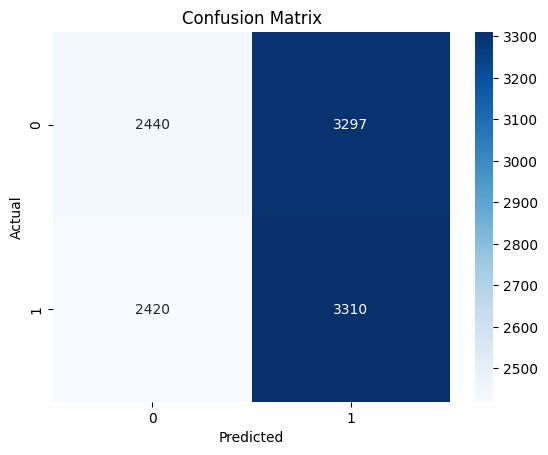

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load and preprocess the dataset
data = pd.read_csv('/content/Heart_Disease_Dataset.csv')  # Replace with your actual dataset path

# Preprocessing steps
binary_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['Sex', 'AgeCategory', 'Race', 'GenHealth', 'Diabetic'], drop_first=True)

# Define features and target
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease'].map({'Yes': 1, 'No': 0})

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Function to make predictions
def predict_heart_disease(input_data):
    # Create a DataFrame with the input data
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Ensure all columns are present (fill missing columns with 0)
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns to match the model's expectations
    input_df = input_df[X.columns]

    # Make prediction
    prediction = clf.predict(input_df)
    return "Yes" if prediction[0] == 1 else "No"

# Streamlit app
st.title("Heart Disease Prediction")

# Input fields
bmi = st.number_input("BMI", min_value=0.0, max_value=100.0, value=25.0)
smoking = st.selectbox("Smoking", [0, 1])
alcohol_drinking = st.selectbox("Alcohol Drinking", [0, 1])
stroke = st.selectbox("Stroke", [0, 1])
physical_health = st.number_input("Physical Health (Days Not Good in Past 30)", min_value=0, max_value=30, value=0)
mental_health = st.number_input("Mental Health (Days Not Good in Past 30)", min_value=0, max_value=30, value=0)
diff_walking = st.selectbox("Difficulty Walking", [0, 1])
sex = st.selectbox("Sex", ["Female", "Male"])
age_category = st.selectbox("Age Category", ["25-29", "30-34", "35-39", "40-44", "50-54", "70-74"])
race = st.selectbox("Race", ["White", "Hispanic", "Black", "Asian", "American Indian/Alaskan Native"])
diabetic = st.selectbox("Diabetic Status", ["No", "No, borderline diabetes", "Yes (during pregnancy)", "Yes"])
physical_activity = st.selectbox("Physical Activity", [0, 1])
gen_health = st.selectbox("General Health", ["Poor", "Fair", "Good", "Very Good", "Excellent"])
sleep_time = st.number_input("Sleep Time (Hours)", min_value=0, max_value=24, value=7)
asthma = st.selectbox("Asthma", [0, 1])
kidney_disease = st.selectbox("Kidney Disease", [0, 1])
skin_cancer = st.selectbox("Skin Cancer", [0, 1])

# Prepare input data
input_data = {
    'BMI': bmi,
    'Smoking': smoking,
    'AlcoholDrinking': alcohol_drinking,
    'Stroke': stroke,
    'PhysicalHealth': physical_health,
    'MentalHealth': mental_health,
    'DiffWalking': diff_walking,
    'Sex_Male': 1 if sex == "Male" else 0,
    'AgeCategory_30-34': 1 if age_category == "30-34" else 0,
    'AgeCategory_35-39': 1 if age_category == "35-39" else 0,
    'AgeCategory_40-44': 1 if age_category == "40-44" else 0,
    'AgeCategory_50-54': 1 if age_category == "50-54" else 0,
    'AgeCategory_70-74': 1 if age_category == "70-74" else 0,
    'Race_Hispanic': 1 if race == "Hispanic" else 0,
    'Race_Black': 1 if race == "Black" else 0,
    'Race_Asian': 1 if race == "Asian" else 0,
    'Race_American Indian/Alaskan Native': 1 if race == "American Indian/Alaskan Native" else 0,
    'Diabetic_No, borderline diabetes': 1 if diabetic == "No, borderline diabetes" else 0,
    'Diabetic_Yes (during pregnancy)': 1 if diabetic == "Yes (during pregnancy)" else 0,
    'Diabetic_Yes': 1 if diabetic == "Yes" else 0,
    'PhysicalActivity': physical_activity,
    'GenHealth_Fair': 1 if gen_health == "Fair" else 0,
    'GenHealth_Good': 1 if gen_health == "Good" else 0,
    'GenHealth_Very Good': 1 if gen_health == "Very Good" else 0,
    'GenHealth_Excellent': 1 if gen_health == "Excellent" else 0,
    'SleepTime': sleep_time,
    'Asthma': asthma,
    'KidneyDisease': kidney_disease,
    'SkinCancer': skin_cancer
}

# Predict button
if st.button("Predict"):
    result = predict_heart_disease(input_data)
    st.write(f"Heart Disease Prediction: {result}")

Writing app.py


In [34]:
! wget -q -O - ipv4.icanhazip.com  ##for getting the code

34.34.39.75


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.34.39.75:8501

⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋your url is: https://huge-rabbits-study.loca.lt
